In [34]:
# Some imports
import keras
from keras.models import load_model 
from keras.applications.vgg16 import VGG16, preprocess_input
import tensorflow as tf
import numpy as np
from numpy import asarray
import cv2
import math
IMG_SIZE = (224,224)

In [35]:
# Load model
vgg16 = load_model('spect_trained_final_1.h5')

In [36]:
X = []
img = cv2.imread('60.jpg')
X.append(img)
X = np.array(X)

def preprocess_imgs(set_name, img_size):
    """
    Resize and apply VGG-16 preprocessing
    """
    set_new = []
    for img in set_name:
        img = cv2.resize(
            img,
            dsize=img_size,
            interpolation=cv2.INTER_CUBIC
        )
        set_new.append(preprocess_input(img))
    return np.array(set_new)

scan_sample = preprocess_imgs(set_name=X, img_size=IMG_SIZE)

In [37]:
#validate on val set
prediction = vgg16.predict(scan_sample)
print(float(prediction))

1.0


In [38]:
#Import LIME
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

# create lime ImageExplainer
explainer = lime_image.LimeImageExplainer()

# Choosing the image from X_test_prep set
image = scan_sample[0].astype(np.uint8)

In [39]:
# Apply LIME to the image
explanation = explainer.explain_instance(image, vgg16.predict, top_labels=2, hide_color=0, num_samples=1000)

100%|██████████| 1000/1000 [02:47<00:00,  5.97it/s]


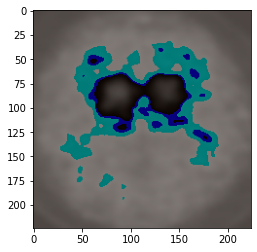

In [46]:
#Arguments for get_image_and_mask() method defined below

import matplotlib.pyplot as plt

temp, mask = explanation.get_image_and_mask(0, positive_only=True, 
                                            num_features=5, 
                                            hide_rest=False)

"""
def get_image_and_mask(self, label, positive_only=True, negative_only=False, hide_rest=False,
                           num_features=5, min_weight=0.):
        Init function.
        Args:
            label: label to explain
            positive_only: if True, only take superpixels that positively contribute to
                the prediction of the label.
            negative_only: if True, only take superpixels that negatively contribute to
                the prediction of the label. If false, and so is positive_only, then both
                negativey and positively contributions will be taken.
                Both can't be True at the same time
            hide_rest: if True, make the non-explanation part of the return
                image gray
            num_features: number of superpixels to include in explanation
            min_weight: minimum weight of the superpixels to include in explanation
        Returns:
            (image, mask), where image is a 3d numpy array and mask is a 2d
            numpy array that can be used with
            skimage.segmentation.mark_boundaries
"""
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask).astype(np.uint8))
plt.imsave("explained.jpg",mark_boundaries(temp / 2 + 0.5, mask).astype(np.uint8))